# Patient Drug Prediction Model

### Goal: 💊 Patient Drug Prescription Prediction

#### Step 1 :- Data Analysis and Data Cleaning

- Importing reuire libraries

In [79]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

- Importing Dataset

In [3]:
file_path = "sp.csv"
df = pd.read_csv(file_path)
df

,Patient_ID,Age,Gender,Fasting_Blood_Sugar,Post_Meal_Blood_Sugar,HbA1c,BMI,Blood_Pressure_Sys,Blood_Pressure_Dia,Cholesterol_Level,Prescribed_Drug
0,1,69,Male,106,141,5.6,19.8,93,66,160,No Medication
1,2,32,Male,94,193,7.5,23.1,110,60,158,Metformin
2,3,89,Male,191,368,5.7,39.3,114,106,165,Insulin
3,4,78,Female,94,140,6.2,24.5,90,95,128,No Medication
4,5,38,Male,130,121,11.8,23.9,161,67,140,Insulin
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,29,Male,166,249,8.8,21.1,104,61,192,Metformin
99996,99997,49,Female,121,185,11.5,20.7,141,107,234,Insulin
99997,99998,18,Male,203,370,9.6,30.6,123,80,120,Insulin
99998,99999,18,Female,117,169,6.6,26.5,96,75,279,No Medication


In [5]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Fasting_Blood_Sugar      0
Post_Meal_Blood_Sugar    0
HbA1c                    0
BMI                      0
Blood_Pressure_Sys       0
Blood_Pressure_Dia       0
Cholesterol_Level        0
Prescribed_Drug          0
dtype: int64

In [9]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Patient_ID             100000 non-null  int64  
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Fasting_Blood_Sugar    100000 non-null  int64  
 4   Post_Meal_Blood_Sugar  100000 non-null  int64  
 5   HbA1c                  100000 non-null  float64
 6   BMI                    100000 non-null  float64
 7   Blood_Pressure_Sys     100000 non-null  int64  
 8   Blood_Pressure_Dia     100000 non-null  int64  
 9   Cholesterol_Level      100000 non-null  int64  
 10  Prescribed_Drug        100000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 8.4+ MB


(None,
    Patient_ID  Age  Gender  Fasting_Blood_Sugar  Post_Meal_Blood_Sugar  HbA1c  \
 0           1   69    Male                  106                    141    5.6   
 1           2   32    Male                   94                    193    7.5   
 2           3   89    Male                  191                    368    5.7   
 3           4   78  Female                   94                    140    6.2   
 4           5   38    Male                  130                    121   11.8   
 
     BMI  Blood_Pressure_Sys  Blood_Pressure_Dia  Cholesterol_Level  \
 0  19.8                  93                  66                160   
 1  23.1                 110                  60                158   
 2  39.3                 114                 106                165   
 3  24.5                  90                  95                128   
 4  23.9                 161                  67                140   
 
   Prescribed_Drug  
 0   No Medication  
 1       Metformin  
 2      

#### Data is clean and dont have any null values therefore visualising the data and correlation of the data

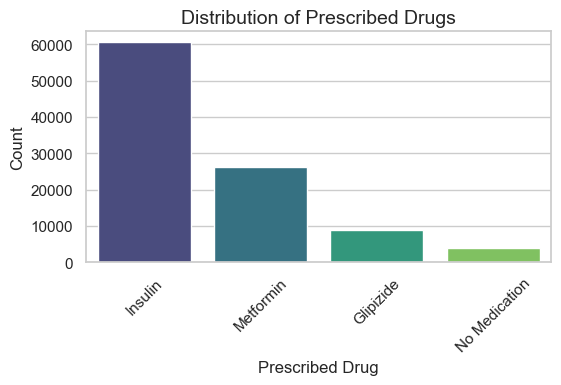

In [11]:

# Set style
sns.set(style="whitegrid")

# Figure size
plt.figure(figsize=(6, 3))

# Plot target variable distribution
sns.countplot(x=df["Prescribed_Drug"], palette="viridis", order=df["Prescribed_Drug"].value_counts().index)
plt.title("Distribution of Prescribed Drugs", fontsize=14)
plt.xlabel("Prescribed Drug")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

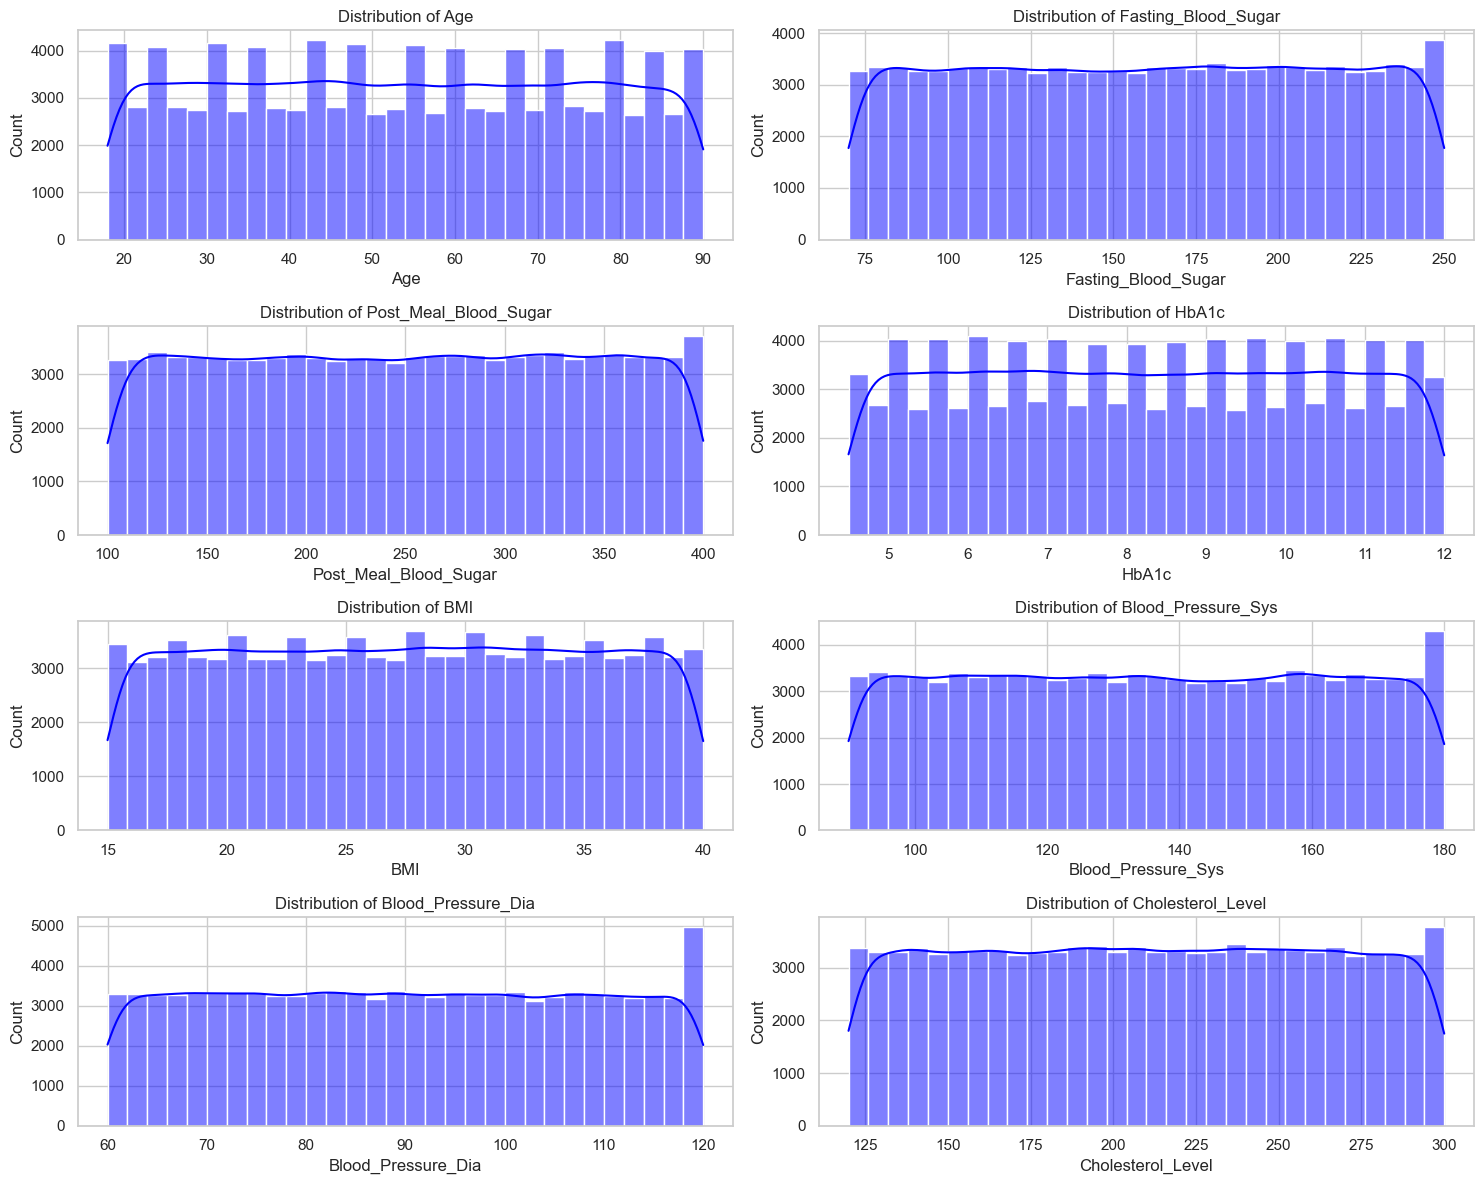

In [13]:
num_features = ["Age", "Fasting_Blood_Sugar", "Post_Meal_Blood_Sugar", "HbA1c", 
                "BMI", "Blood_Pressure_Sys", "Blood_Pressure_Dia", "Cholesterol_Level"]

# Set up the figure
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

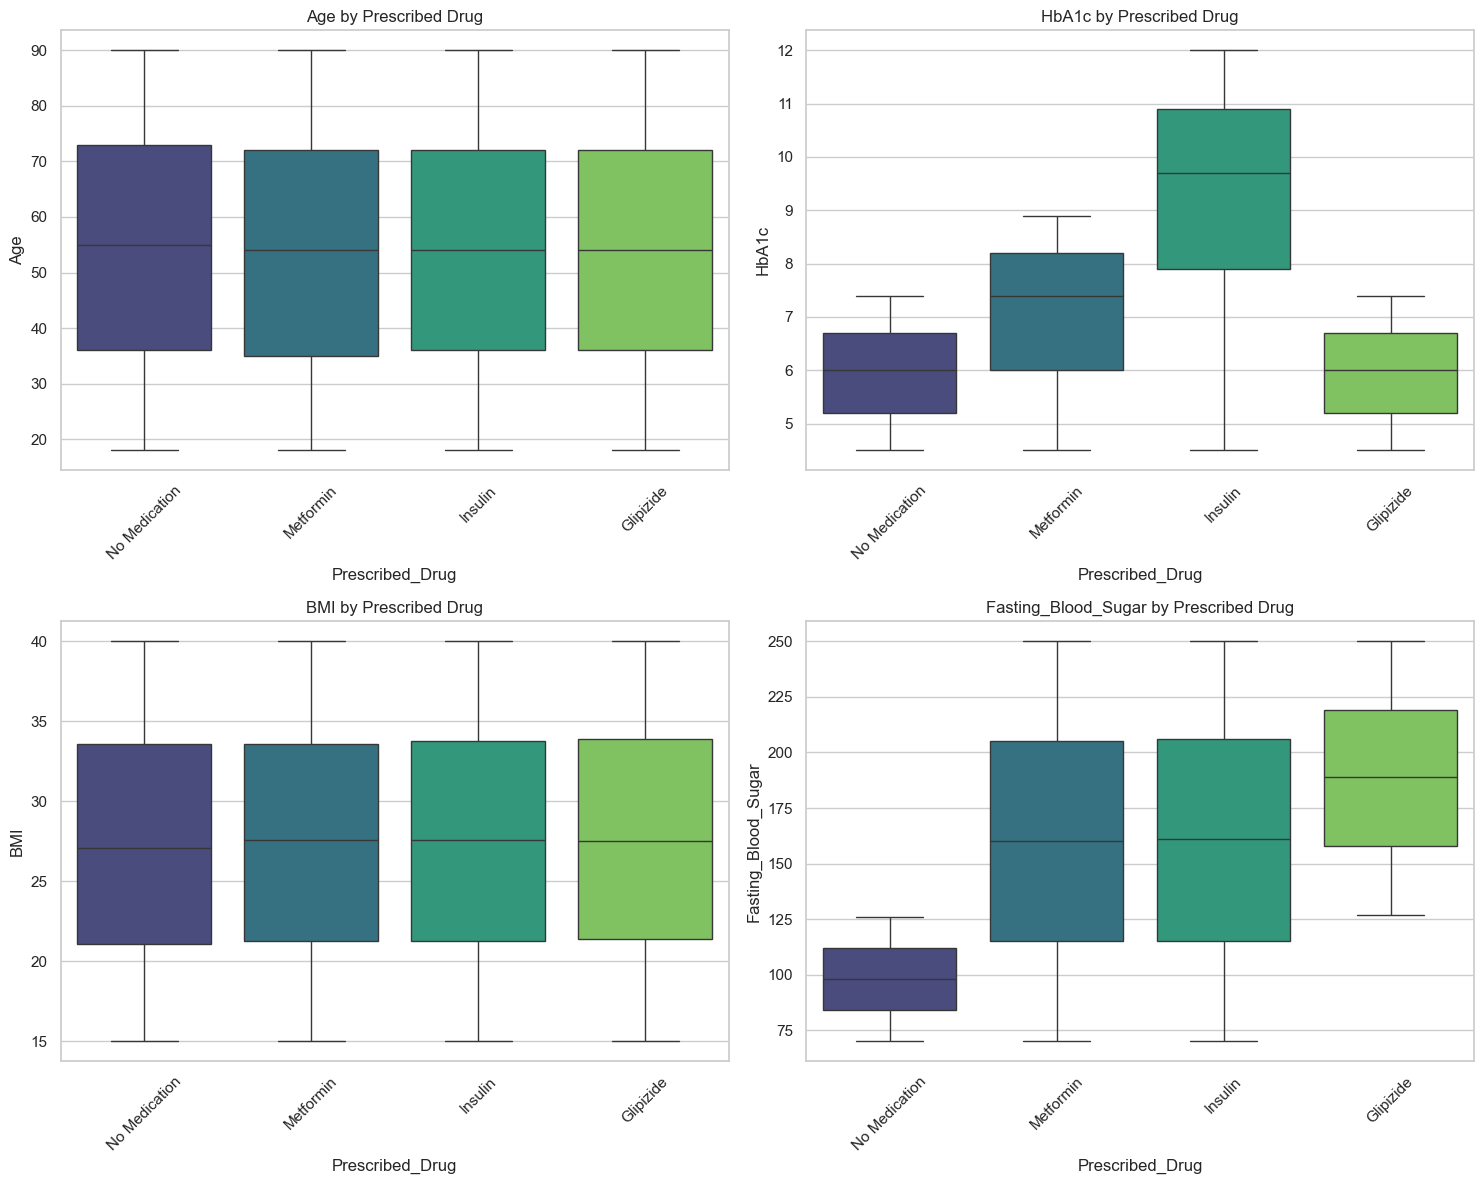

In [14]:
# Plot boxplots for key numerical variables grouped by prescribed drug
plt.figure(figsize=(15, 12))
for i, feature in enumerate(["Age", "HbA1c", "BMI", "Fasting_Blood_Sugar"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Prescribed_Drug", y=feature, data=df, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{feature} by Prescribed Drug")
plt.tight_layout()
plt.show()

In [15]:
# Drop Patient_ID
df = df.drop(columns=["Patient_ID"])

### Step 2 :- Model Building

#### Building all ML models To see Which Among them works good 

In [16]:
# Encode categorical variables
label_encoders = {}
for col in ["Gender", "Prescribed_Drug"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
skewness = df.skew()

# Display skewness values
skewness

Age                      0.007719
Gender                   0.005120
Fasting_Blood_Sugar     -0.005833
Post_Meal_Blood_Sugar   -0.005737
HbA1c                    0.003155
BMI                     -0.003955
Blood_Pressure_Sys       0.005012
Blood_Pressure_Dia       0.008725
Cholesterol_Level        0.000228
Prescribed_Drug          0.452029
dtype: float64

In [18]:
# Define features and target variable
X = df.drop(columns=["Prescribed_Drug"])
y = df["Prescribed_Drug"]

In [19]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
l=LogisticRegression()
l.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predictions
y_pred = l.predict(X_test)
y_pred

array([3, 1, 1, ..., 1, 1, 1])

In [33]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.71675

In [97]:
dt=DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [99]:
# Predictions
y_pre = dt.predict(X_test)
y_pre

array([3, 1, 1, ..., 1, 1, 1])

In [101]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pre)
accuracy

1.0

In [103]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [105]:
# Predictions
y_pred = gbc.predict(X_test)
y_pred

array([3, 1, 1, ..., 1, 1, 1])

In [107]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [81]:
svm=SVC()
svm.fit(X_train, y_train)

SVC()

In [109]:
# Predictions
y_pred = svm.predict(X_test)
y_pred

array([3, 1, 1, ..., 1, 1, 1])

In [112]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.89215

In [71]:
# Train Random Forest Classifier
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Predictions
y_pred = rf.predict(X_test)
y_pred

array([3, 1, 1, ..., 1, 1, 1])

In [73]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 1754,     0,     0,     0],
       [    0, 12145,     0,     0],
       [    0,     0,  5260,     0],
       [    0,     0,     0,   841]], dtype=int64)

In [39]:
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1754\n           1       1.00      1.00      1.00     12145\n           2       1.00      1.00      1.00      5260\n           3       1.00      1.00      1.00       841\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

### Selecting Best model and Reason
#### Why Choose Random Forest?
- Better Generalization – Reduces overfitting compared to a single Decision Tree.
- Handles Noise & Large Datasets – Works well even with missing or unbalanced data.
- Faster Training – Uses parallel processing, unlike Gradient Boosting, which is sequential.
- More Robust & Stable – Less sensitive to small data variations.
- Feature Importance – Easily interprets which features matter most.

"""
## Conclusion: 
Patient Drug Prediction Model

The notebook successfully implemented a classification model to predict patient drug prescriptions. 
Key findings include:

1. Data was preprocessed by handling duplicates and encoding categorical features.
2. Multiple classification models were trained, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, SVM, and KNN.
3. The final evaluation showed perfect accuracy (100%) on the test dataset.
4. The confusion matrix and classification report indicate that the model correctly classified all cases without errors.

While the results are promising, such perfect accuracy suggests potential overfitting, and further validation on unseen data is recommended.
"""
